# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Funções Auxiliares

In [2]:
def dataFrame_to_boxPlot(dataFrame,var):
    data = {}
    column_value = []
    column_x = []

    for column in range(len(dataFrame.columns)):
        column_value += list(dataFrame.iloc[:,column])
        column_x += [f'x{column+1}' for i in range(len(dataFrame))]

    data[var]=column_value
    data['x']=column_x
    return pd.DataFrame(data)

In [3]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(len(dataframe.iloc[0,0])):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

# Importando Dados

In [4]:
past = 'C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/'

In [5]:
previsoes_np = {}
previsoes = []
for index in range(60):
    with open(past+f'Prev_pro/Previsao_pro{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_np['demandas'] = previsoes
previsoes_np = pd.DataFrame(previsoes_np)
previsoes_np.head()


,demandas
0,"[89.44865417480469, 89.7499771118164, 90.17575..."
1,"[89.34261322021484, 89.48824310302734, 89.5622..."
2,"[88.97976684570312, 88.89714050292969, 89.1076..."
3,"[89.639892578125, 89.3507308959961, 90.0578002..."
4,"[89.48078155517578, 89.7647476196289, 90.19262..."


In [6]:
len(previsoes_np.iloc[1,0])

17

In [7]:
previsoes_ar = {}
previsoes = []
for index in range(60):
    with open(past+f'Prev_ari/Previsao_ari{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_ar['demandas'] = previsoes
previsoes_ar = pd.DataFrame(previsoes_ar)

In [8]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas')[['date','demandas']]

demandas_treino = df_demandas['demandas']
demandas_treino.head()

0    91
1    87
2    89
3    89
4    91
Name: demandas, dtype: int64

In [9]:
demandas = {}
demandas_aux = []
for i in range(0,int(len(demandas_treino)/52)):
    demandas_aux.append(list(demandas_treino[i*52:(i+1)*52].values))
demandas['demandas'] = demandas_aux
demandas = pd.DataFrame(demandas)

In [10]:
with open('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Prev_teste/test_arima.txt', "r") as arquivo:
	test_ar = [float(demanda) for demanda in arquivo.read().split(',')]

with open('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Prev_teste/test_pro.txt', "r") as arquivo:
	test_np = [float(demanda) for demanda in arquivo.read().split(',')]


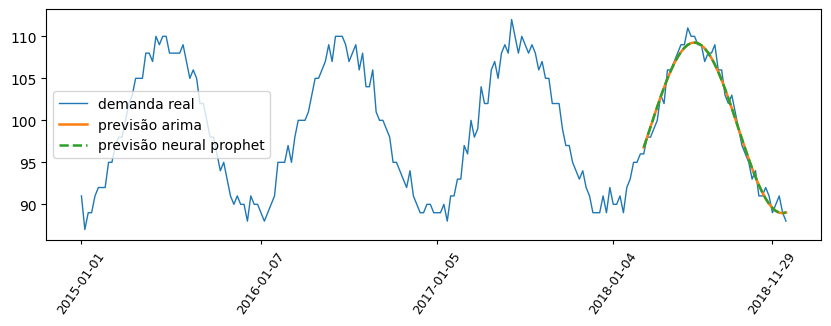

In [11]:
fig=plt.figure(figsize=(10,3))
ax=fig.add_subplot(1,1,1)

plt.plot(df_demandas.date,df_demandas.demandas,label='demanda real', linewidth=1)
plt.plot(df_demandas.date.iloc[166:],test_ar,label='previsão arima', linestyle='-',linewidth=1.8)
plt.plot(df_demandas.date.iloc[166:],test_ar,label='previsão neural prophet',linestyle='--', linewidth=1.8)
plt.xticks([df_demandas.date.values[i] for i in [0,53,105,157,204]])
plt.tick_params(axis='x', labelsize=9, length=3)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.legend()


plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/prev_testes.png', bbox_inches='tight',pad_inches = 0.1,format='png')


# Analise Das Previsões

In [12]:
previsao_demanda_np = describe_var(previsoes_np,'demandas')
previsao_demanda_ar = describe_var(previsoes_ar,'demandas')
demandas_d = describe_var(demandas,'demandas')

In [13]:
boxPlot_previsao_np = dataFrame_to_boxPlot(previsao_demanda_np,'demandas')
boxPlot_previsao_ar = dataFrame_to_boxPlot(previsao_demanda_ar,'demandas')
boxPlot_demandas = dataFrame_to_boxPlot(demandas_d,'demandas')

In [14]:
previsao_demanda_np

,demandas1,demandas2,demandas3,demandas4,demandas5,demandas6,demandas7,demandas8,demandas9,demandas10,demandas11,demandas12,demandas13,demandas14,demandas15,demandas16,demandas17
0,89.448654,89.749977,90.175758,90.721390,91.381096,92.147903,93.013580,93.968597,95.002090,96.101845,97.254311,98.444656,99.656906,100.874069,102.078346,103.251434,104.374802
1,89.342613,89.488243,89.562271,89.798279,90.465187,92.596443,94.399796,94.658165,96.130203,97.033134,97.276054,98.411888,99.663635,100.673615,101.880753,102.763000,103.867302
2,88.979767,88.897141,89.107628,90.295105,90.665710,92.720383,93.585205,94.686943,95.863289,96.675262,97.613823,98.671608,99.185860,99.840012,100.807808,103.122833,103.913940
3,89.639893,89.350731,90.057800,90.012665,90.449577,91.552536,92.572739,94.196991,95.681068,96.724319,98.439384,97.792961,99.289413,100.740723,101.417023,102.747131,103.647186
4,89.480782,89.764748,90.192627,90.733200,91.407745,92.183281,93.052055,93.979126,95.032219,96.097221,97.281570,98.447388,99.678474,100.899239,102.090843,103.260864,104.387688
5,89.065483,89.418472,89.948593,90.327736,91.150146,92.203506,93.453842,94.347717,95.300179,96.326973,97.415771,98.552452,99.721207,100.904709,102.084435,103.240944,104.354355
6,89.725555,89.574844,89.174965,90.560265,92.018272,92.053192,93.578316,94.289536,95.250671,95.861641,97.584740,98.797188,99.676826,100.171638,101.663376,102.736702,104.181778
7,89.310913,89.590714,90.055908,90.511993,91.295250,92.133408,93.120514,94.220222,95.517700,96.383499,97.385780,98.300186,99.315521,100.226608,101.521690,102.754326,104.140198
8,89.374695,89.486458,89.660767,89.963097,90.903389,92.649788,93.791977,94.691559,95.817261,96.626633,97.403229,98.576271,99.612335,100.601013,101.780045,102.995010,104.160172
9,89.410881,89.680222,90.103294,90.638214,91.351051,92.153244,92.995735,93.980850,95.024315,96.147079,97.314789,98.489098,99.667641,100.913864,102.109688,103.273537,104.387581


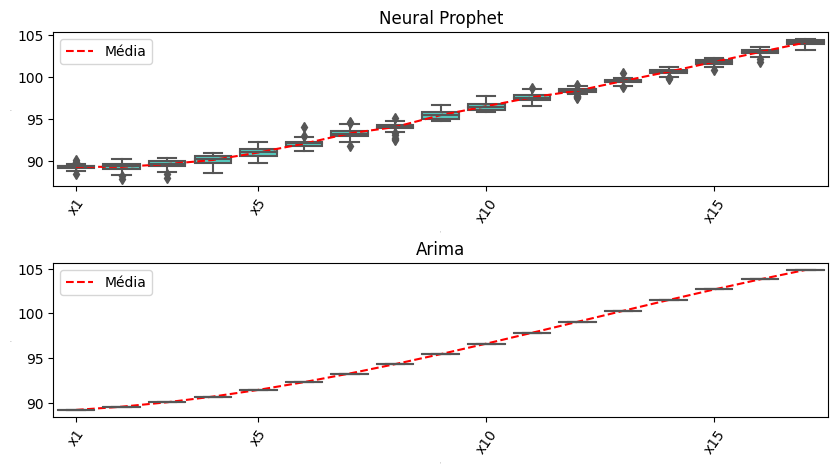

In [21]:
fig=plt.figure(figsize=(10,5))
#fig.suptitle('Distribuição das Previsões de Demandas por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(2,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_previsao_np,x='x',y='demandas',color='turquoise')
plt.plot(previsao_demanda_np.columns,previsao_demanda_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(previsao_demanda_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(2,1,2)
ax.set_title('Arima')
sns.boxplot(data=boxPlot_previsao_ar,x='x',y='demandas',color='turquoise')
plt.plot(previsao_demanda_np.columns,previsao_demanda_ar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(previsao_demanda_ar.columns)/5)+1)])
plt.legend()

'''
ax=fig.add_subplot(3,1,3)
ax.set_title('Demandas Passadas')
sns.boxplot(data=boxPlot_demandas,x='x',y='demandas',color='turquoise')
plt.plot(demandas_d.columns,demandas_d.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(demandas_d.columns)/5)+1)])
plt.legend()
'''

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Previsoes.png', format='png', bbox_inches='tight',pad_inches = 0.1)

In [20]:
previsao_demanda_np.describe()

,demandas1,demandas2,demandas3,demandas4,demandas5,demandas6,demandas7,demandas8,demandas9,demandas10,demandas11,demandas12,demandas13,demandas14,demandas15,demandas16,demandas17
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,89.342811,89.330618,89.664544,90.148209,91.036388,92.090479,93.309110,94.068985,95.478089,96.537399,97.596503,98.381281,99.533965,100.641858,101.798455,102.975017,104.104442
std,0.282886,0.437538,0.462072,0.519521,0.550915,0.497539,0.534288,0.504736,0.446094,0.418646,0.454513,0.317215,0.267143,0.288099,0.284898,0.288507,0.279144
min,88.446777,87.898407,88.021011,88.650520,89.758530,91.210739,91.759033,92.575378,94.825500,95.861641,96.547470,97.549576,98.875618,99.775452,100.807808,101.749969,103.231194
25%,89.193197,89.100584,89.458374,89.788937,90.602123,91.787657,93.007513,93.949190,95.005259,96.111780,97.280191,98.257401,99.364431,100.500643,101.592075,102.832216,103.906013
50%,89.378246,89.421082,89.648693,90.259403,91.123024,92.146400,93.226826,94.018330,95.473408,96.491386,97.499924,98.443436,99.583843,100.693966,101.777649,102.989025,104.153946
75%,89.450087,89.661892,90.068823,90.637407,91.400724,92.246029,93.580038,94.347059,95.814537,96.801849,97.835606,98.554411,99.668930,100.865532,102.068724,103.204227,104.360804
max,90.166603,90.213272,90.346184,91.003372,92.242981,94.039421,94.647079,95.178246,96.687813,97.716675,98.693344,99.101898,100.506691,101.196114,102.277611,103.608414,104.531502


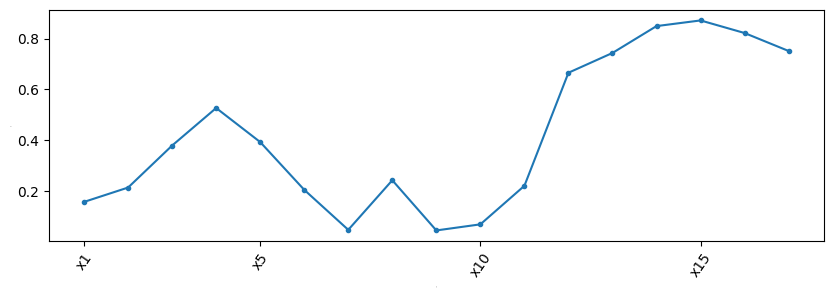

In [19]:
fig=plt.figure(figsize=(10,3))

ax=fig.add_subplot(1,1,1)
plt.plot([f'x{i}' for i in range(1,18)], #x
         abs(previsao_demanda_ar.describe().iloc[1,:]-previsao_demanda_np.describe().iloc[1,:]),  #y
         marker='.')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(previsao_demanda_np.columns)/5)+1)])
plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Previsoes.png', format='png', bbox_inches='tight',pad_inches = 0.1)